# 作業目標:
    了解 Padding 的作法
    
    了解 Pooling 的作法

# 作業重點:
    (1) 調整Padding 的設定, 看 Pad 後的結果
    
    (2) 調整Pooling 的設定, 看 Pooling 後的結果

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

np.random.seed(1)

In [0]:
# GRADED FUNCTION: zero_pad
def zero_pad(X, pad):
    """
    DO zero-padding on array X

    args:
    X     -- a numpy array, shape like (m, n_H, n_W, n_C)
             m: a batch of images
             n_H: image height
             n_W: image width
             n_C: channels

    pad   -- number of zero paddings

    returns:
    X_pad -- a numpy array, shape will be (m, n_H + 2*pad, n_W + 2*pad, n_C)
    """
    ### Code ###
    X_pad = np.pad(X, ((0, 0),        # m: don't pad
                       (pad, pad),    # n_H: pad
                       (pad, pad),    # n_W: pad
                       (0, 0)),       # n_C: don't pad
                      'constant', constant_values=(0, 0))
    
    return X_pad

shape of x: (1, 9, 9, 1)

shape of x_pad: (1, 15, 15, 1)

x: 
[[ 37 235 140  72 255 137 203 133  79]
 [192 144 129 204  71 237 252 134  25]
 [178  20 254 101 146 212 139 252 234]
 [156 157 142  50  68 215 215 233 241]
 [247 222  96  86 141 233 137   7  63]
 [ 61  22  57   1 128  60 209   8 216]
 [141 115 175 234 121 200  30  71 131]
 [198 149  49  57   3 196  24 241  43]
 [ 76  26  52  80 109 115  41 210  15]]

x_pad: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  37 235 140  72 255 137 203 133  79   0   0   0]
 [  0   0   0 192 144 129 204  71 237 252 134  25   0   0   0]
 [  0   0   0 178  20 254 101 146 212 139 252 234   0   0   0]
 [  0   0   0 156 157 142  50  68 215 215 233 241   0   0   0]
 [  0   0   0 247 222  96  86 141 233 137   7  63   0   0   0]
 [  0   0   0  61  22  57   1 128  60 209   8 216   0   0   0]
 [  0   0 

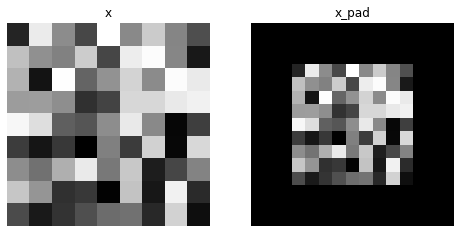

In [3]:
x = np.random.randint(256, size=(1, 9, 9, 1)) # 產生gray image
x_pad = zero_pad(x, 3) # 加三圈 Pad
print(f"shape of x: {x.shape}\n")
print(f"shape of x_pad: {x_pad.shape}\n")

img = x[0].squeeze()
img_pad = x_pad.squeeze()
print(f"x: \n{img}\n")
print(f"x_pad: \n{img_pad}\n")

plt.subplots(1,2, figsize=(8, 5))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('x')

plt.subplot(1,2,2)
plt.imshow(img_pad, cmap='gray')
plt.axis('off')
plt.title('x_pad');

In [0]:
# GRADED FUNCTION: pool_forward
def pool_forward(A_prev, hparameters, mode="max"):
    """
    A feed-forward pooling layer

    args:
    A_prev      -- a numpy array, shape like (m, n_H, n_W, n_C)
    hparameter  -- a dictionary with "filter" and "stride"
    mode        -- string, include "max" or "avg"
    
    return:
    A -- a numpy array, shape will be (m, n_H, n_W, n_C) 
    """

    # 檢索尺寸 from the input shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape

    # 檢索超參數 from "hparameters"
    f = hparameters["filter"]
    stride = hparameters["stride"]

    # 定義輸出的 dimensions: floor(1 + (n+2p-f) / s)
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev

    # 初始化輸出的 matrix A
    A = np.zeros((m, n_H, n_W, n_C))

    ### Code ###
    for i in range(m): # 訓練樣本的 for 迴圈
        for h in range(n_H): # 輸出樣本的 for 迴圈, 針對 vertical axis
            for w in range(n_W): # 輸出樣本的 for 迴圈, 針對 horizontal axis
                for c in range (n_C): # 輸出樣本的 for 迴圈, 針對 channels

                    # 找出特徵圖的寬度跟高度四個點
                    vert_start = h * stride
                    vert_end = h * stride + f
                    horiz_start = w * stride
                    horiz_end = w * stride + f

                    # 定義第i個訓練示例中
                    a_prev_slice = A_prev[i, vert_start:vert_end, horiz_start:horiz_end, c]

                    # 計算輸入data 的池化結果. 使用 if statment 去做分類
                    if mode == "max":
                        A[i, h, w, c] = np.max(a_prev_slice)
                    elif mode == "avg":
                        A[i, h, w, c] = np.mean(a_prev_slice)

    
    # 儲存輸入的特徵圖跟所設定的超參數, 可以用在 pool_backward()
    cache = (A_prev, hparameters)
    
    # 確認輸出的資料維度
    assert(A.shape == (m, n_H, n_W, n_C))
    
    return A, cache

Max pooling:

shape of x: (1, 9, 9, 1)

shape of x_pool: (1, 7, 7, 1)

x: 
[[ 37 235 140  72 255 137 203 133  79]
 [192 144 129 204  71 237 252 134  25]
 [178  20 254 101 146 212 139 252 234]
 [156 157 142  50  68 215 215 233 241]
 [247 222  96  86 141 233 137   7  63]
 [ 61  22  57   1 128  60 209   8 216]
 [141 115 175 234 121 200  30  71 131]
 [198 149  49  57   3 196  24 241  43]
 [ 76  26  52  80 109 115  41 210  15]]

img_pool: 
[[254. 254. 255. 255. 255. 252. 252.]
 [254. 254. 254. 237. 252. 252. 252.]
 [254. 254. 254. 233. 233. 252. 252.]
 [247. 222. 142. 233. 233. 233. 241.]
 [247. 234. 234. 234. 233. 233. 216.]
 [198. 234. 234. 234. 209. 241. 241.]
 [198. 234. 234. 234. 200. 241. 241.]]



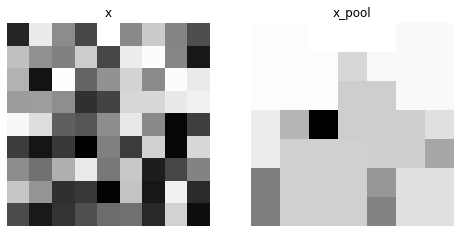

In [5]:
hparameters = {"stride": 1, "filter": 3}
x_pool, cache = pool_forward(x, hparameters, mode="max")
print("Max pooling:\n")
print(f"shape of x: {x.shape}\n")
print(f"shape of x_pool: {x_pool.shape}\n")

img = x[0].squeeze()
img_pool = x_pool.squeeze()
print(f"x: \n{img}\n")
print(f"img_pool: \n{img_pool}\n")

plt.subplots(1,2, figsize=(8, 5))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('x')

plt.subplot(1,2,2)
plt.imshow(img_pool, cmap='gray')
plt.axis('off')
plt.title('x_pool');

Average pooling:

shape of x: (1, 9, 9, 1)

shape of x_pool: (1, 7, 7, 1)

x: 
[[ 37 235 140  72 255 137 203 133  79]
 [192 144 129 204  71 237 252 134  25]
 [178  20 254 101 146 212 139 252 234]
 [156 157 142  50  68 215 215 233 241]
 [247 222  96  86 141 233 137   7  63]
 [ 61  22  57   1 128  60 209   8 216]
 [141 115 175 234 121 200  30  71 131]
 [198 149  49  57   3 196  24 241  43]
 [ 76  26  52  80 109 115  41 210  15]]

img_pool: 
[[147.66666667 144.33333333 152.44444444 159.44444444 183.55555556
  188.77777778 161.22222222]
 [152.44444444 133.44444444 129.44444444 144.88888889 172.77777778
  209.88888889 191.66666667]
 [163.55555556 125.33333333 120.44444444 139.11111111 167.33333333
  182.55555556 169.        ]
 [128.88888889  92.55555556  85.44444444 109.11111111 156.22222222
  146.33333333 147.66666667]
 [126.22222222 112.         115.44444444 133.77777778 139.88888889
  106.11111111  96.88888889]
 [107.44444444  95.44444444  91.66666667 111.11111111 107.88888889
  115.4444

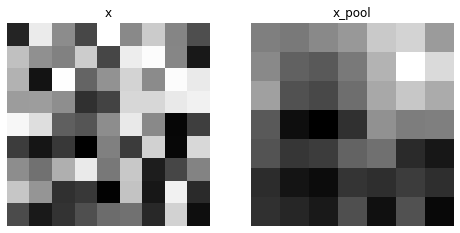

In [6]:
hparameters = {"stride": 1, "filter": 3}
x_pool, cache = pool_forward(x, hparameters, mode="avg")
print("Average pooling:\n")
print(f"shape of x: {x.shape}\n")
print(f"shape of x_pool: {x_pool.shape}\n")

img = x[0].squeeze()
img_pool = x_pool.squeeze()
print(f"x: \n{img}\n")
print(f"img_pool: \n{img_pool}\n")

plt.subplots(1,2, figsize=(8, 5))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('x')

plt.subplot(1,2,2)
plt.imshow(img_pool, cmap='gray')
plt.axis('off')
plt.title('x_pool');